### Importing the data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics as metrics 

from random import randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
from tsfresh import select_features
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_relevant_features

In [4]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## Loading the Datasets

In [6]:
Xextract = pd.read_csv('X_extractedfull.csv')

In [7]:
Xextract = Xextract.drop(['Unnamed: 0'], axis = 1)

In [8]:
Xextract.head()

,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__minimum,value__sum_values.1,...,value__minimum.15,value__sum_values.16,value__median.16,value__mean.16,value__length.16,value__standard_deviation.16,value__variance.16,value__root_mean_square.16,value__maximum.16,value__minimum.16
0,964040.95,156.25,160.673492,6000.0,13.938147,194.271939,161.276914,191.51,145.83,656801.481,...,30.363,34.617,0.5770,0.576950,60.0,0.026852,0.000721,0.577575,0.624,0.532
1,963619.92,156.06,160.603320,6000.0,14.117791,199.312019,161.222636,191.47,145.73,656129.342,...,33.648,33.951,0.5595,0.565850,60.0,0.027013,0.000730,0.566494,0.626,0.524
2,962086.32,155.72,160.347720,6000.0,14.191436,201.396849,160.974495,191.41,145.37,654953.068,...,35.098,34.592,0.5620,0.576533,60.0,0.036422,0.001327,0.577683,0.662,0.529
3,961128.53,155.56,160.188088,6000.0,14.226617,202.396639,160.818594,191.34,145.14,654388.843,...,36.105,34.156,0.5550,0.569267,60.0,0.033184,0.001101,0.570233,0.645,0.527
4,960002.83,155.34,160.000472,6000.0,14.275244,203.782600,160.636028,191.41,144.95,653588.606,...,36.992,34.642,0.5760,0.577367,60.0,0.033203,0.001102,0.578321,0.660,0.524


### Train -Test split

In [9]:
profile = pd.read_csv('profile.txt', delimiter = '\t', header = None)
profile.columns = ["Cooler Condition","Valve Condition","Internal Pump Leakage","Hydraulic Accumulator","Stable Flag"]

In [10]:
profile_pump = profile['Internal Pump Leakage']

In [11]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(Xextract, profile_pump, train_size=0.7, test_size=0.3, random_state=42,stratify = profile_pump)

In [12]:
y_traindf = pd.DataFrame(y_train)
y_testdf = pd.DataFrame(y_test)

print(y_train.value_counts())
print(y_test.value_counts())

0    855
2    344
1    344
Name: Internal Pump Leakage, dtype: int64
0    366
2    148
1    148
Name: Internal Pump Leakage, dtype: int64


In [13]:

## SMOTE method is used to balance data
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=45, k_neighbors=5)
X_train, y_train = smt.fit_sample(X_train,y_train)
X_train = pd.DataFrame(X_train, columns=X_train.columns)

y_train_smt = pd.DataFrame(y_train)

In [14]:
y_train_smt['Internal Pump Leakage'].value_counts()

1    855
2    855
0    855
Name: Internal Pump Leakage, dtype: int64

### Standardisation

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() ## x-mean/std

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [17]:
X_train_scaled.columns = Xextract.columns 
X_test_scaled.columns = Xextract.columns 

In [18]:

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV

from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
def evaluate_model(dt_classifier,y_train,X_train,y_test,X_test):
    print("Train Precision :", (precision_score(y_train, dt_classifier.predict(X_train)))*100)
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Precision :", (precision_score(y_test, dt_classifier.predict(X_test)))*100)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### SVM for Cooler condition classification

### PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(random_state=42)
X_train_pca = pca.fit(X_train_scaled)

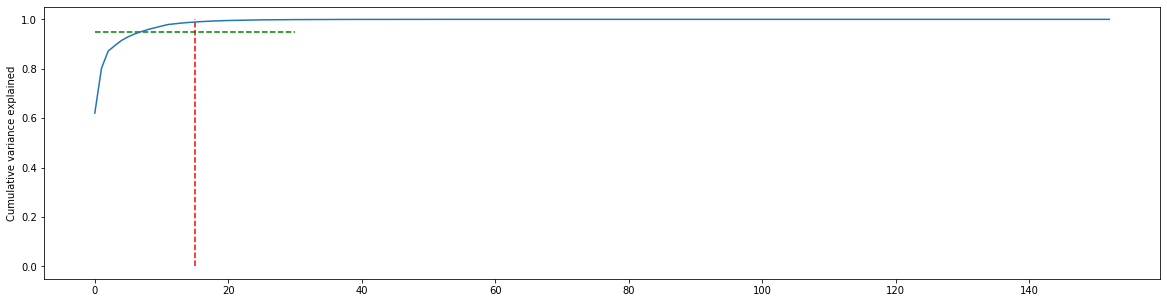

In [22]:
import matplotlib.pyplot as plt

var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[20,5])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [23]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=17)

X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)


In [24]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(2565, 17)
(662, 17)


In [25]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [26]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_pca, y_train)
svm_predictions = svm_model_linear.predict(X_test_pca)

In [27]:
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[366,   0,   0],
       [  0, 140,   8],
       [  1,   3, 144]], dtype=int64)

In [28]:
def cmatrix(model,test):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = metrics.plot_confusion_matrix(model, test,y_test,ax = ax,
                                        display_labels = ['No leakage','Weak leakage','Severe Leakage'])
    return disp.confusion_matrix
    

array([[366,   0,   0],
       [  0, 140,   8],
       [  1,   3, 144]], dtype=int64)

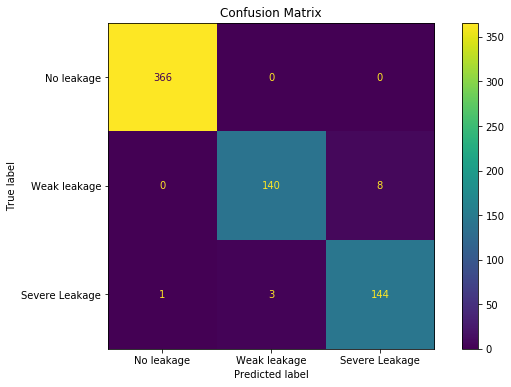

In [29]:
cmatrix(svm_model_linear, X_test_pca)

In [30]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       0.98      0.95      0.96       148
           2       0.95      0.97      0.96       148

    accuracy                           0.98       662
   macro avg       0.97      0.97      0.97       662
weighted avg       0.98      0.98      0.98       662



In [31]:
y_score_svm = svm_model_linear.fit(X_train_pca, y_train).decision_function(X_test_pca)
y_score_svm

array([[ 2.28746365,  1.29864175, -0.31233654],
       [-0.23702756,  2.27367259,  0.77330095],
       [ 2.2740768 ,  1.2935652 , -0.30770646],
       ...,
       [ 2.30683844,  1.31453618, -0.32196229],
       [-0.29688173,  1.22527656,  2.28611729],
       [ 2.28182208,  1.29807154, -0.31099822]])

In [32]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(y_score, X_test, y_test, n_classes= 3, figsize = (20,6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

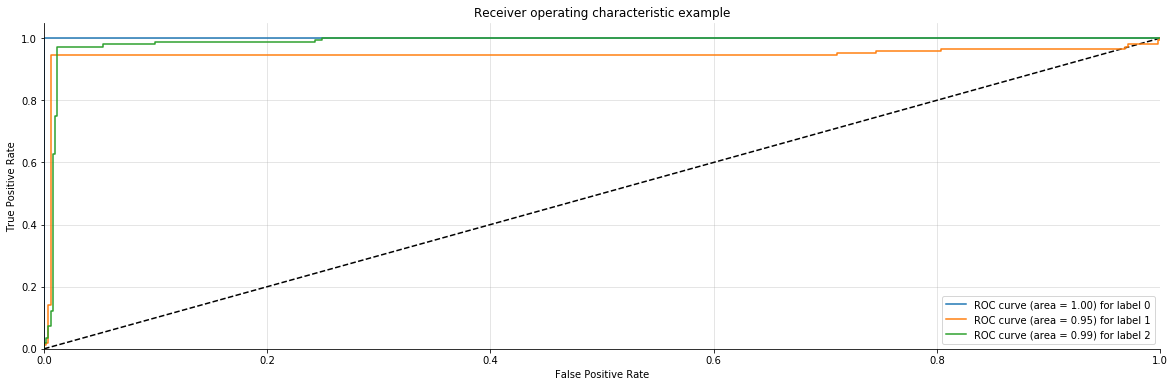

In [33]:
plot_multiclass_roc(y_score_svm,X_test_pca, y_test, 3)

### Building an RF classifier for Cooler 

In [34]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

array([[366,   0,   0],
       [  0, 145,   3],
       [  0,   2, 146]], dtype=int64)

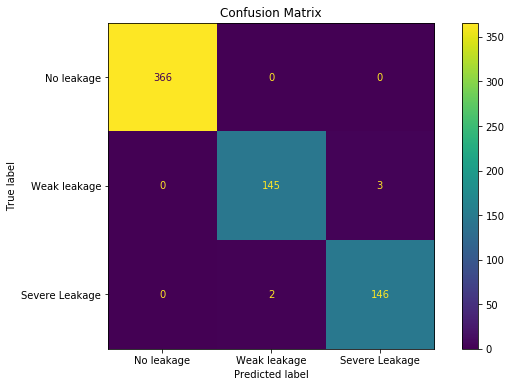

In [36]:
cmatrix(classifier_rf, X_test_scaled)

In [37]:
y_score_rf = classifier_rf.fit(X_train_pca, y_train).predict_proba(X_test_pca)
y_score_rf

array([[1. , 0. , 0. ],
       [0. , 0.7, 0.3],
       [1. , 0. , 0. ],
       ...,
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ]])

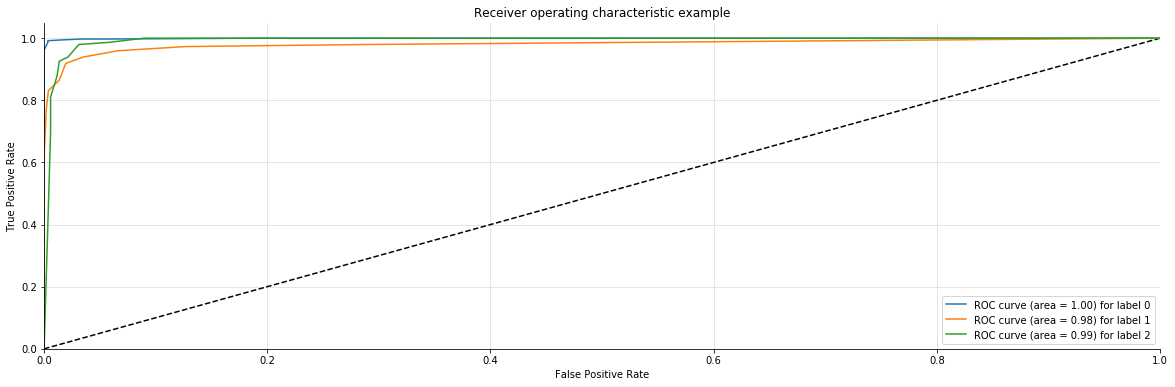

In [38]:
plot_multiclass_roc(y_score_rf, X_test_pca, y_test, n_classes=3, figsize=(20, 6))

In [39]:
print(metrics.classification_report(y_test, classifier_rf.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       366
           1       0.93      0.91      0.92       148
           2       0.94      0.93      0.94       148

    accuracy                           0.96       662
   macro avg       0.95      0.94      0.95       662
weighted avg       0.96      0.96      0.96       662



In [40]:
rf_hyper = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight = 'balanced')

In [41]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

## maximum depth is 1,2,5,10,20
## minimum sample leaf is 5,10,20,50,100
## maximum no. of features is 2,3,4
## no. of trees is 10, 30,50,100,200

In [42]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator= rf_hyper, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "f1_macro")

In [43]:
%%time
grid_search.fit(X_train_scaled,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.3min


Wall time: 2min 48s


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.8min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='f1_macro', verbose=1)

In [44]:
rf_best = grid_search.best_estimator_ ## best estimator is assigned to rf_best
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=3,
                       min_samples_leaf=5, n_estimators=30, n_jobs=-1,
                       random_state=42)

array([[366,   0,   0],
       [  0, 145,   3],
       [  0,   0, 148]], dtype=int64)

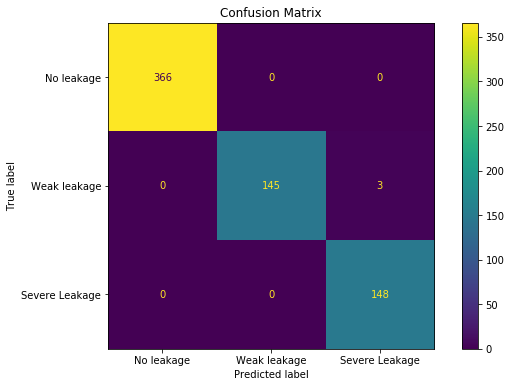

In [45]:
cmatrix(rf_best, X_test_scaled)

In [56]:
y_score_rf_hyper = rf_best.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
y_score_rf_hyper

array([[0.99444444, 0.00555556, 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       ...,
       [0.87666667, 0.12333333, 0.        ],
       [0.        , 0.03333333, 0.96666667],
       [0.99444444, 0.00555556, 0.        ]])

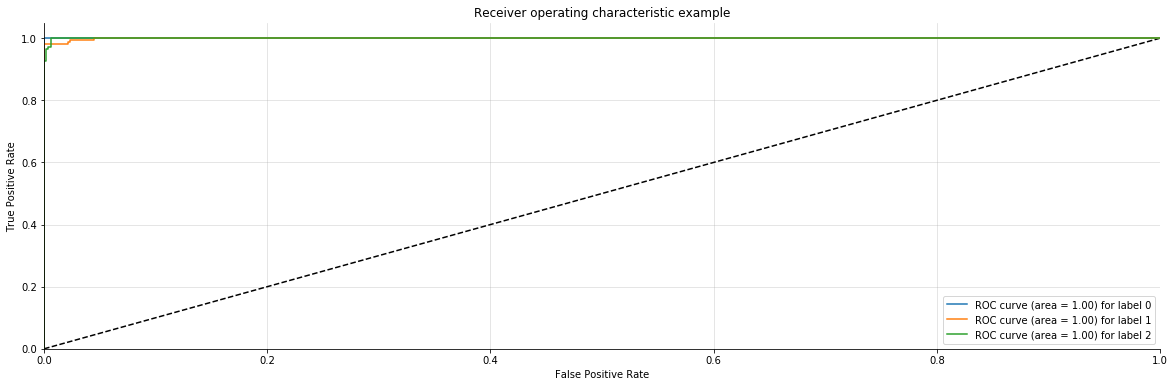

In [57]:
plot_multiclass_roc(y_score_rf_hyper, X_test_scaled, y_test, n_classes=3, figsize=(20, 6))

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_best.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      0.98      0.99       148
           2       0.98      1.00      0.99       148

    accuracy                           1.00       662
   macro avg       0.99      0.99      0.99       662
weighted avg       1.00      1.00      1.00       662



### kNN for cooler failure classification

In [49]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_pca, y_train)


array([[365,   0,   1],
       [  0, 140,   8],
       [  0,  13, 135]], dtype=int64)

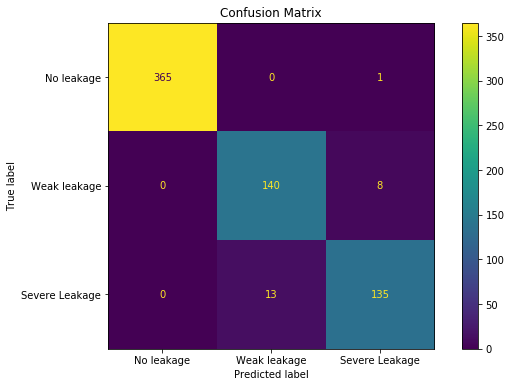

In [50]:
cmatrix(knn, X_test_pca)

In [51]:
y_score_knn = knn.fit(X_train_pca, y_train).predict_proba(X_test_pca)
y_score_knn

array([[1.        , 0.        , 0.        ],
       [0.        , 0.71428571, 0.28571429],
       [1.        , 0.        , 0.        ],
       ...,
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ]])

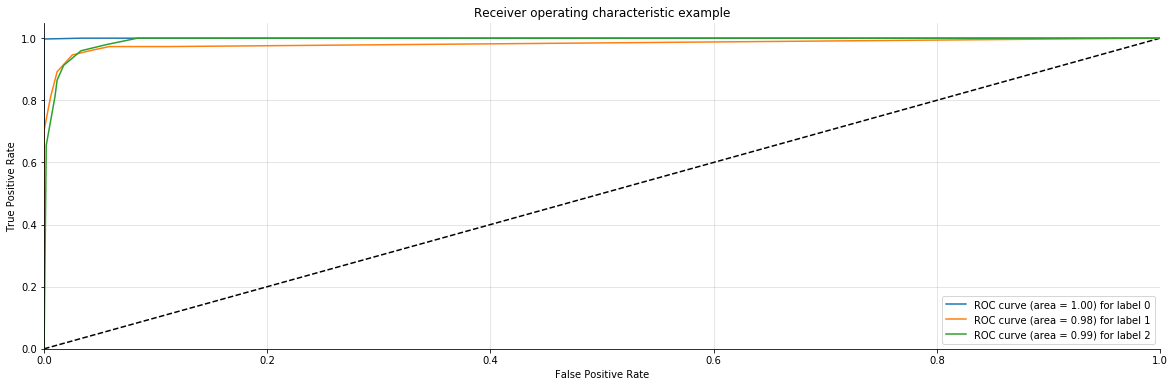

In [52]:
plot_multiclass_roc(y_score_knn, X_test_pca, y_test, n_classes=3, figsize=(20, 6))

In [53]:
print(metrics.classification_report(y_test, knn.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       0.92      0.95      0.93       148
           2       0.94      0.91      0.92       148

    accuracy                           0.97       662
   macro avg       0.95      0.95      0.95       662
weighted avg       0.97      0.97      0.97       662



### Performance in Noise

In [54]:
import numpy as np 
mu, sigma = 0, np.std(X_test_scaled)*0.20
noise = np.random.normal(mu, sigma, X_test_scaled.shape)

X_testnoise = X_test_scaled + noise

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       366
           1       0.72      0.64      0.68       148
           2       0.79      0.78      0.78       148

    accuracy                           0.85       662
   macro avg       0.81      0.80      0.80       662
weighted avg       0.85      0.85      0.85       662



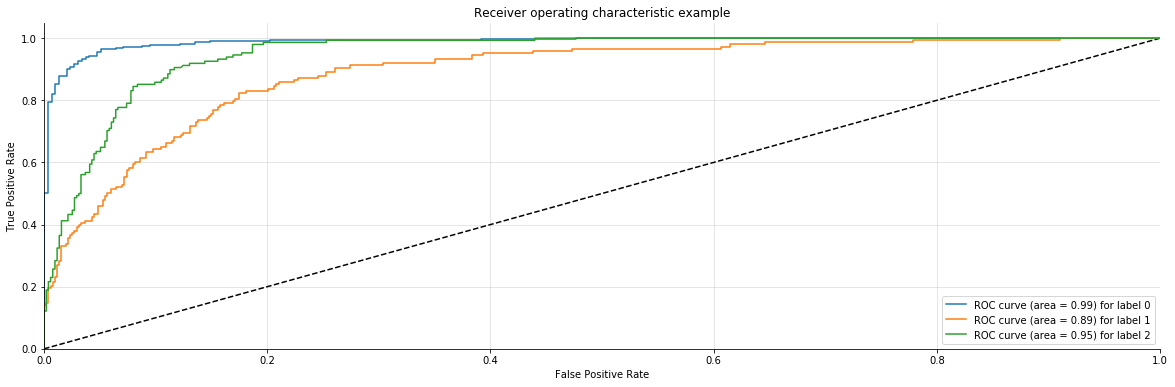

In [59]:
print(metrics.classification_report(y_test, rf_best.predict(X_testnoise)))

y_score_rf_hypernoise = rf_best.fit(X_train_scaled, y_train).predict_proba(X_testnoise)
y_score_rf_hypernoise

plot_multiclass_roc(y_score_rf_hypernoise, X_testnoise, y_test, n_classes=3, figsize=(20, 6))

In [60]:
import numpy as np 
mu, sigma = 0, np.std(X_test_pca)*0.20
noise = np.random.normal(mu, sigma, X_test_pca.shape)

X_testpcanoise = X_test_pca + noise

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       366
           1       0.64      0.65      0.64       148
           2       0.72      0.73      0.72       148

    accuracy                           0.83       662
   macro avg       0.77      0.78      0.77       662
weighted avg       0.84      0.83      0.84       662



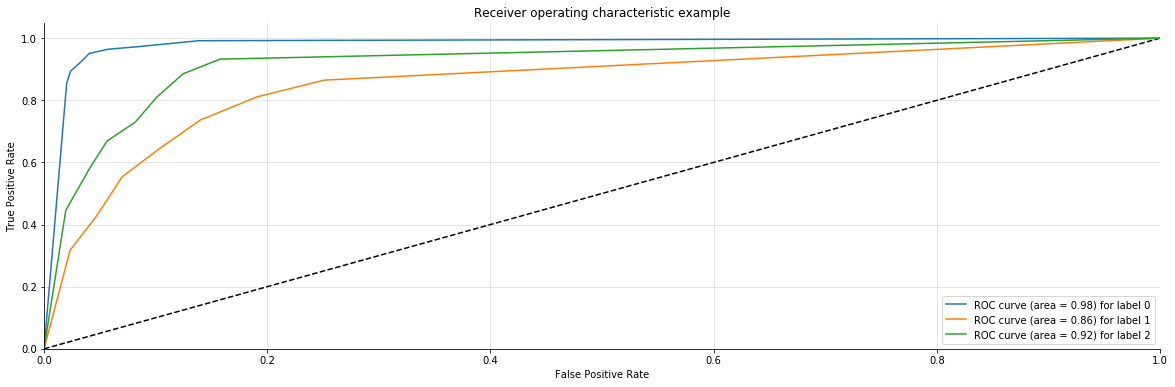

In [61]:
print(metrics.classification_report(y_test, knn.predict(X_testpcanoise)))

y_score_knnnoise = knn.fit(X_train_pca, y_train).predict_proba(X_testpcanoise)
y_score_knnnoise

plot_multiclass_roc(y_score_knnnoise, X_testpcanoise, y_test, n_classes=3, figsize=(20, 6))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       366
           1       0.49      0.51      0.50       148
           2       0.67      0.64      0.66       148

    accuracy                           0.76       662
   macro avg       0.69      0.69      0.69       662
weighted avg       0.76      0.76      0.76       662



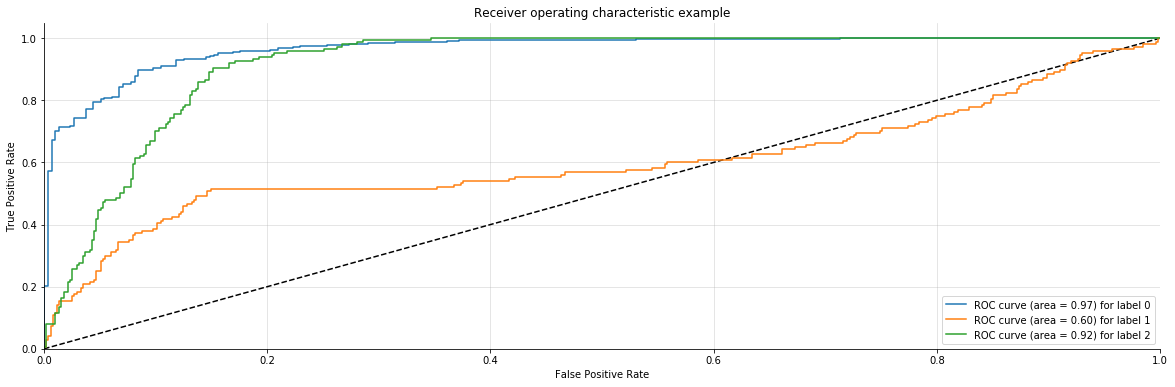

In [62]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_testpcanoise)))

y_score_svmnoise = svm_model_linear.fit(X_train_pca, y_train).decision_function(X_testpcanoise)
y_score_svmnoise

plot_multiclass_roc(y_score_svmnoise, X_testpcanoise, y_test, n_classes=3, figsize=(20, 6))

### Building a Gradient boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

# First we construct our gradient boosting model, 
# We specify 500 trees to start, each with a maximum 
# depth of three. We also specify the random_state 
# hyperparameter to ensure reproduceability.
gbtc = GradientBoostingClassifier(n_estimators=100, random_state= 42)

In [64]:
parameters = {'max_depth':np.arange( 2,6,1 ).tolist()}

In [65]:
clf_gbtc = GridSearchCV(gbtc, parameters,cv=6, n_jobs= -1, iid = True,  refit= True,pre_dispatch= '2*n_jobs')

In [66]:
clf_gbtc.fit(X_train_pca, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=6, estimator=GradientBoostingClassifier(random_state=42),
             iid=True, n_jobs=-1, param_grid={'max_depth': [2, 3, 4, 5]})

In [67]:
cmatrix(clf_gbtc, X_test_pca)

TypeError: cmatrix() missing 1 required positional argument: 'test'

In [ ]:
y_score_gbtc = clf_gbtc.fit(X_train_pca, y_train).predict_proba(X_test_pca)
y_score_gbtc

In [ ]:
plot_multiclass_roc(y_score_gbtc, X_test_pca, y_test, n_classes=3, figsize=(20, 6))

In [ ]:
import xgboost as xgb

In [ ]:
seed= 24
xgb1 = xgb.sklearn.XGBClassifier(learning_rate =0.1,n_estimators=100,max_depth=5,min_child_weight=11,
             gamma=0.1,subsample=0.8,colsample_bytree=0.7,objective='multi:softprob',n_jobs=-1,scale_pos_weight=1,
             seed=seed)
    
xgb1.fit(X_train, y_train)
    
y_pred= xgb1.predict(X_test)
    
    #confusion matrix and classification report
    
cm = confusion_matrix(y_test, y_pred)
    
print(classification_report(y_test, y_pred))